## Projeto K-Means: Sistemas Inteligentes


#### 🎯 Objetivos:

Neste projeto, usaremos algoritmos de clustering (K-Means, K-Medoids) para uma abordagem não-supervisionada em um conjunto de dados sobre universidades dos EUA. O objetivo é agrupar corretamente as duas classes: universidades públicas e universidades privadas com base nas suas características.

##### **Checklist**

- Análise exploratória ✅
- Tratamento dos dados
  - Scaler ✅
  - Limpeza dos dados ✅
- Cálculo do K
  - Elbow method ✅
  - Calinski-Harabasz ✅
  - Davies-Bouldin ✅
  - Silhouette ✅
  - BIC ✅
- Treinar o K-Means✅
- Treinar o K-Medoids ✅
- Comparar os algortimos K-Means e K-Medoids
  - Distância Intra-clusters ✅
  - Distância Inter-clusters ✅
- Fazer “perguntas” em cada cluster
  - Como se distribuem os valores para a variável X em cada cluster ✅
  - Qual o valor médio da variável Z em cada cluster ✅
  - Etc
- Visualizar os clusters através de PCA (Principal Component Analysis) ✅

#### 🔁 Conectando o Google Colab ao Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 📚 Importando as bibliotecas necessárias

In [ ]:
pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from math import ceil

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8, 6

#### 🎲 Importando os dados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projetos Sistemas Inteligentes/College.csv')

#### 👀 Dando uma olhada na estrutura geral dos dados

In [ ]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

##### ***Dicionário dos dados:***

- Private: Um fator com níveis Não e Sim indicando universidade particular ou pública
- Apps: Número de inscrições/aplicações recebidas
- Accept: Número de inscrições/aplicações aceitas
- Enroll: Número de novos alunos matriculados
- Top10perc: Percentual dos novos alunos nos 10% melhores do H.S. Class
- Top25perc: Percentual dos novos alunos nos 25% melhores do H.S. Class
- F.Undergrad: Número de alunos de graduação em tempo integral
- P.Undergrad: Número de alunos de graduação em meio período
- Outstate: Ensino fora do estado
- Room.Board: Custos de hospedagem e alimentação
- Books: Custos estimados de livros
- Personal: Estimativa de gastos pessoais
- PhD: Pct. do corpo docente com Ph.D.
- Terminal: porcentagem do corpo docente com grau terminal (maior titulo)
- S.F.Ratio: Proporção aluno/professor
- perc.alumni: Porcentagem dos ex-alunos que doam
- Expend: Despesas com instrução por aluno
- Grad.Rate: Taxa de graduação

#### 🔎📊 Análise Exploratória:

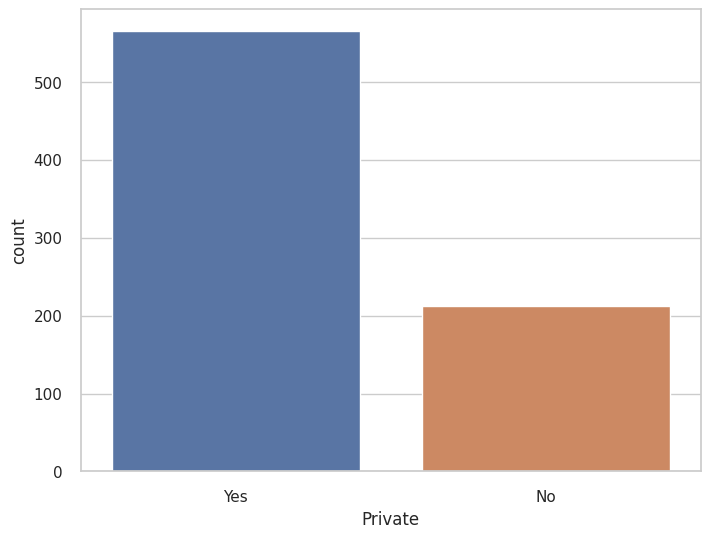

In [ ]:
sns.countplot(x = 'Private', data = df)
plt.show()

In [ ]:
df.corr().unstack().sort_values(ascending=False).drop_duplicates().head(20)

<ipython-input-348-cb14d7f7fe83>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().unstack().sort_values(ascending=False).drop_duplicates().head(20)


Apps         Apps           1.000000
F.Undergrad  Enroll         0.964640
Accept       Apps           0.943451
             Enroll         0.911637
Top25perc    Top10perc      0.891995
F.Undergrad  Accept         0.874223
Terminal     PhD            0.849587
Apps         Enroll         0.846822
F.Undergrad  Apps           0.814491
Expend       Outstate       0.672779
             Top10perc      0.660913
Outstate     Room.Board     0.654256
Grad.Rate    Outstate       0.571290
P.Undergrad  F.Undergrad    0.570512
perc.alumni  Outstate       0.566262
Outstate     Top10perc      0.562331
PhD          Top25perc      0.545862
             Top10perc      0.531828
Expend       Top25perc      0.527447
Top25perc    Terminal       0.524749
dtype: float64

In [ ]:
df.corr().unstack().sort_values(ascending=True).drop_duplicates().head(10)

<ipython-input-349-15943a1955e4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().unstack().sort_values(ascending=True).drop_duplicates().head(10)


Expend       S.F.Ratio     -0.583832
S.F.Ratio    Outstate      -0.554821
perc.alumni  S.F.Ratio     -0.402929
Top10perc    S.F.Ratio     -0.384875
S.F.Ratio    Room.Board    -0.362628
             Grad.Rate     -0.306710
Outstate     Personal      -0.299087
S.F.Ratio    Top25perc     -0.294629
Personal     perc.alumni   -0.285968
P.Undergrad  perc.alumni   -0.280792
dtype: float64

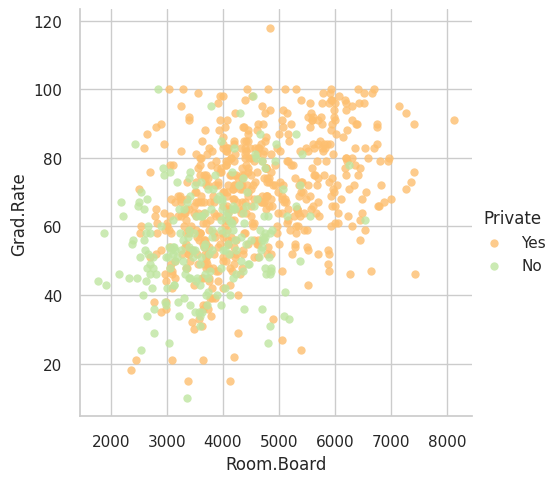

In [ ]:
sns.set_style('whitegrid')
sns.lmplot(data=df, x ='Room.Board', y='Grad.Rate', hue='Private', palette='Spectral', aspect=1, fit_reg=False)

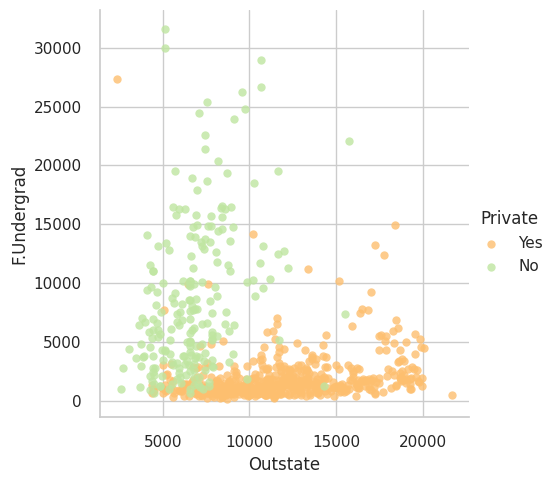

In [ ]:
sns.lmplot(data=df, x='Outstate',y='F.Undergrad', hue='Private',
           palette='Spectral',aspect=1,fit_reg=False)

#### 🧹🪣 Data Cleaning + Pré processamento:

Percebemos uma instância com um percentual de graduação maior do que 100 e resolvemos ajustar para 100:

In [ ]:
df.loc[df['Grad.Rate'] > 100]

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [ ]:
df['Grad.Rate']['Cazenovia College'] = 100

<ipython-input-353-bc95ac68ab2d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grad.Rate']['Cazenovia College'] = 100


Ajustamos também a variável categórica "Private" para de Yes ou No para 1 ou 0:

In [ ]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [ ]:
df['Cluster'] = df['Private'].apply(converter)

**Utilização de um Scaler:**

Quando os dados apresentam variáveis em escalas muito diferentes, que é o nosso caso, as variáveis com maiores magnitudes podem dominar o cálculo das distâncias do k-means, enquanto as variáveis com menores magnitudes podem ter pouca influência. Isso pode resultar em clusters mal definidos ou com sobreposições.

O MinMaxScaler é uma técnica de pré-processamento que dimensiona as variáveis para o intervalo entre 0 e 1, preservando a forma da distribuição original. Essa técnica pode ajudar a evitar que a escala das variáveis influencie negativamente os resultados do k-means.

In [ ]:
from sklearn import preprocessing
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df.drop(columns = ['Unnamed: 0', 'Private']))
df_numeric_scaled = pd.DataFrame(minmax_processed, index = df.index, columns=df.drop(columns = ['Unnamed: 0', 'Private']).columns)
df_numeric_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,0.032887,0.044177,0.107913,0.231579,0.472527,0.087164,0.024548,0.263430,0.239596,0.157754,0.297710,0.652632,0.710526,0.418231,0.187500,0.072671,0.462963,1.0
1,0.043842,0.070531,0.075035,0.157895,0.219780,0.080752,0.056148,0.513430,0.736129,0.291444,0.190840,0.221053,0.078947,0.260054,0.250000,0.138387,0.425926,1.0
2,0.028055,0.039036,0.047349,0.221053,0.450549,0.028473,0.004488,0.460227,0.310530,0.135472,0.139695,0.473684,0.552632,0.278820,0.468750,0.104605,0.407407,1.0
3,0.006998,0.010549,0.016045,0.621053,0.879121,0.011776,0.002839,0.548554,0.578499,0.157754,0.095420,0.884211,0.960526,0.139410,0.578125,0.298415,0.453704,1.0
4,0.002333,0.002818,0.003146,0.157895,0.384615,0.003492,0.039753,0.269628,0.368852,0.313725,0.190840,0.715789,0.631579,0.252011,0.031250,0.145833,0.046296,1.0


#### 🗂️ Definindo a matriz de atributos e o vetor target:

In [ ]:
X = df_numeric_scaled.drop(columns = ['Cluster'])
y = df_numeric_scaled['Cluster']

#### Encontrando o melhor valor para K através de diversos métodos:

**Elbow Method:**

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

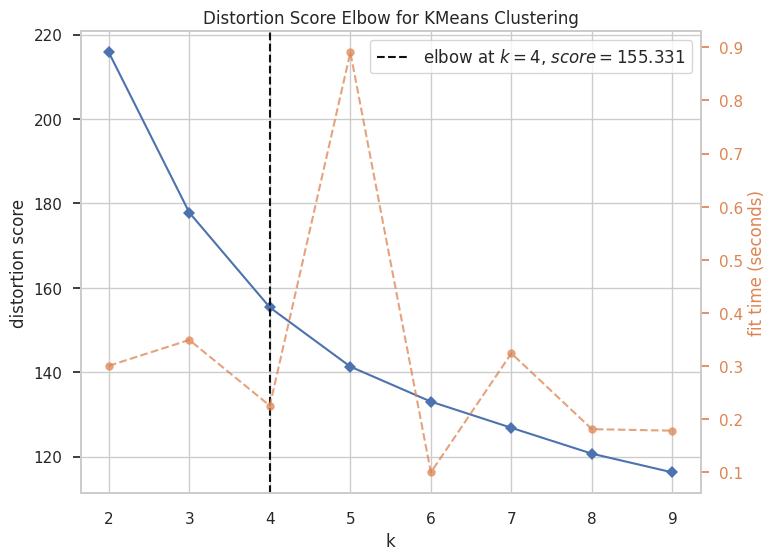

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state = 42)
visualizer = KElbowVisualizer(km, k = (2,10))

visualizer.fit(X)
visualizer.show()

O método do cotovelo (elbow method) é uma técnica utilizada para determinar o número ideal de clusters no algoritmo de k-means. Nesse método, plotamos um gráfico da variância explicada em relação ao número de clusters, e o ponto em que a curva começa a apresentar uma diminuição mais suave é o ponto de "cotovelo", que indica o número ideal de clusters.

Para esse caso, conseguimos enxergar o K=4.

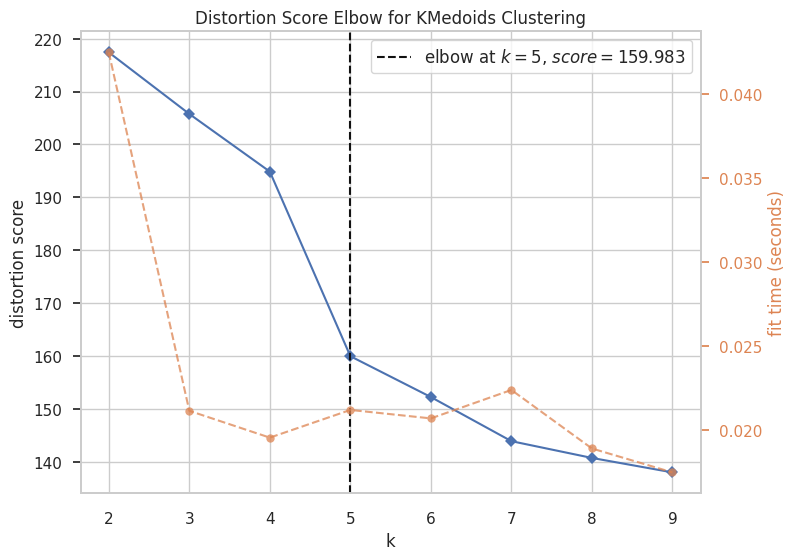

<Axes: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

kmedoids = KMedoids(random_state = 42)
visualizer = KElbowVisualizer(kmedoids, k = (2,10))

visualizer.fit(X)
visualizer.show()

**Silhouette Method:**

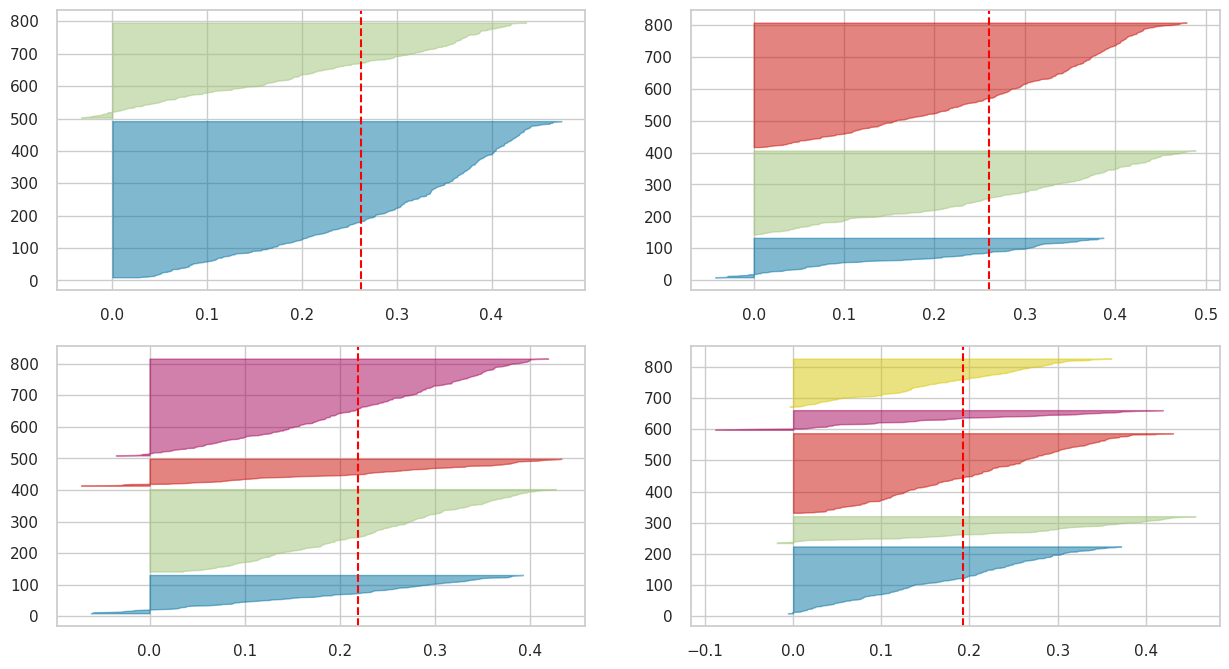

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:

    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

Cada ponto no gráfico de silhueta representa uma observação do conjunto de dados e a largura de cada barra vertical representa a sua silhueta. A silhueta é uma medida de quão bem uma observação se encaixa em seu cluster e quão diferente ela é dos outros clusters. A silhueta varia de -1 a 1, sendo valores mais próximos de 1 indicando que a observação está bem ajustada ao seu cluster e é muito diferente dos outros clusters, enquanto valores mais próximos de -1 indicam que a observação pode estar no cluster errado e é muito semelhante a outras observações em outro cluster.

Observando os gráficos que maximizam o valor médio da silhueta, temos que k=2 e k=3 são bons resultados.

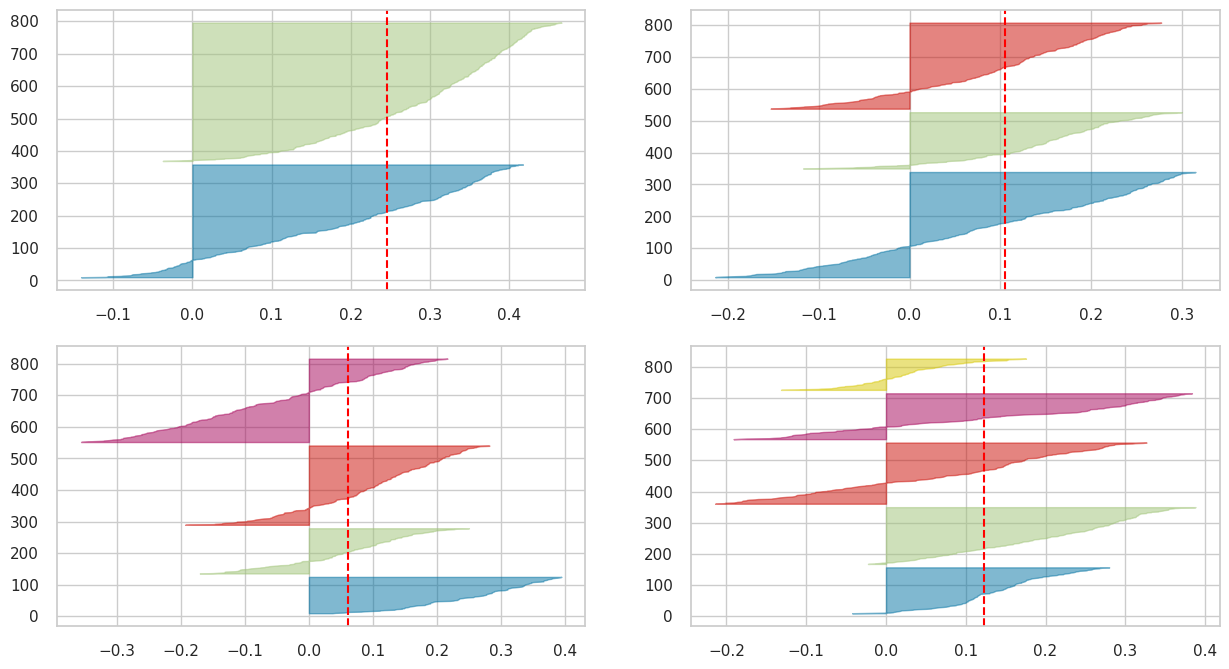

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:

    kmedoids = KMedoids(n_clusters=i, random_state=42)
    q, mod = divmod(i, 2)

    visualizer = SilhouetteVisualizer(kmedoids, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

Para o K-Medoids: K=2

**Calinski-Harabasz Score**

In [ ]:
from sklearn.metrics import calinski_harabasz_score
results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(X)
    db_index = calinski_harabasz_score(X, labels)
    results.update({i: db_index})

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

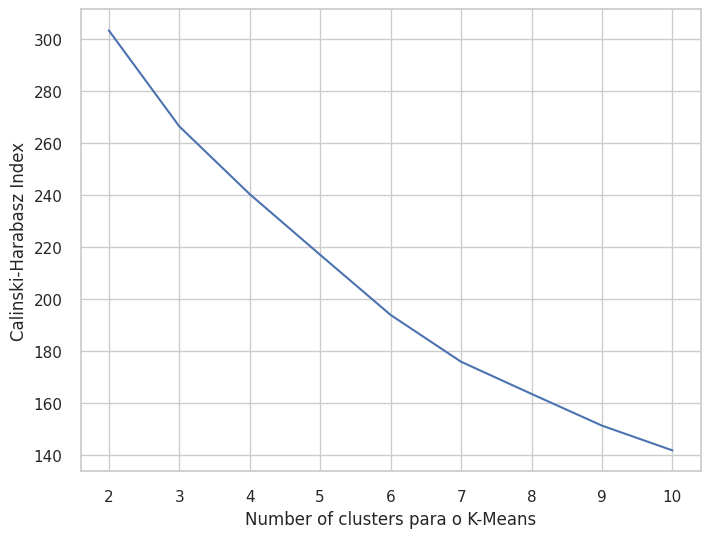

In [ ]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters para o K-Means")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

O índice de Calinski-Harabasz mede a relação entre a dispersão inter-cluster (ou seja, entre grupos) e a dispersão intra-cluster (ou seja, dentro de cada grupo) para diferentes valores de k. O valor do índice de Calinski-Harabasz aumenta à medida que a dispersão inter-cluster aumenta e a dispersão intra-cluster diminui, indicando que os clusters são bem definidos e separados uns dos outros.

Ou seja, identificamos k=2 para o valor máximo do índice.

In [ ]:
from sklearn.metrics import calinski_harabasz_score
results = {}

for i in range(2,11):
    kmedoids = KMedoids(n_clusters=i, random_state=30)
    labels = kmedoids.fit_predict(X)
    db_index = calinski_harabasz_score(X, labels)
    results.update({i: db_index})

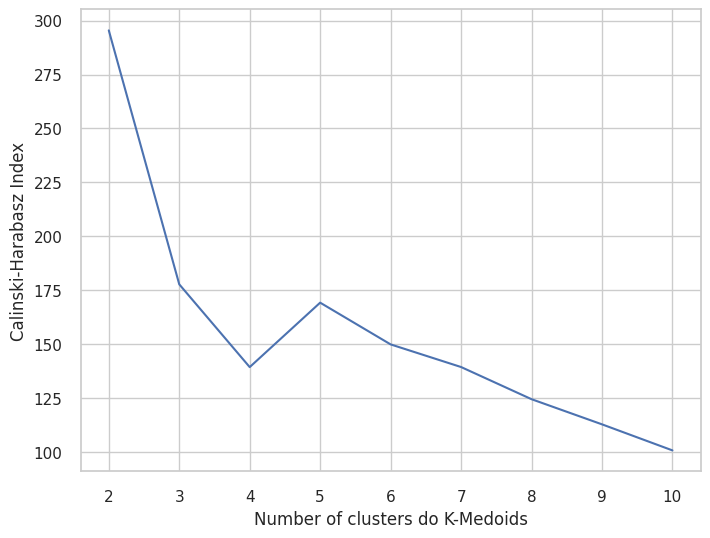

In [ ]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters do K-Medoids")
plt.ylabel("Calinski-Harabasz Index")
plt.show()

Para o K-Medoids: K=2

**Davies Bouldin Score:**

In [ ]:
from sklearn.metrics import davies_bouldin_score

results = {}

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=30)
    labels = kmeans.fit_predict(X)
    db_index = davies_bouldin_score(X, labels)
    results.update({i: db_index})

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

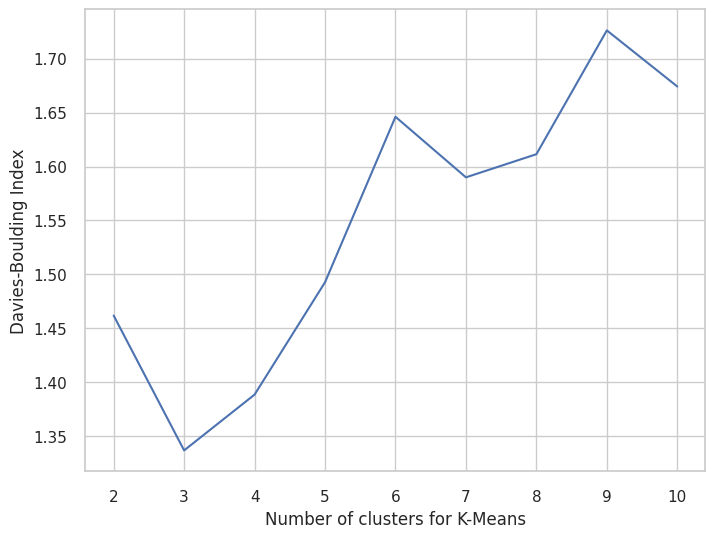

In [ ]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters for K-Means")
plt.ylabel("Davies-Boulding Index")
plt.show()

O número ideal de clusters é aquele que minimiza o valor do índice de Davies-Bouldin. Isso significa que um valor menor do índice indica um melhor agrupamento. Ou seja, K=3.

In [ ]:
from sklearn.metrics import davies_bouldin_score

results = {}

for i in range(2,11):
    kmedoids = KMedoids(n_clusters=i, random_state=30)
    labels = kmedoids.fit_predict(X)
    db_index = davies_bouldin_score(X, labels)
    results.update({i: db_index})

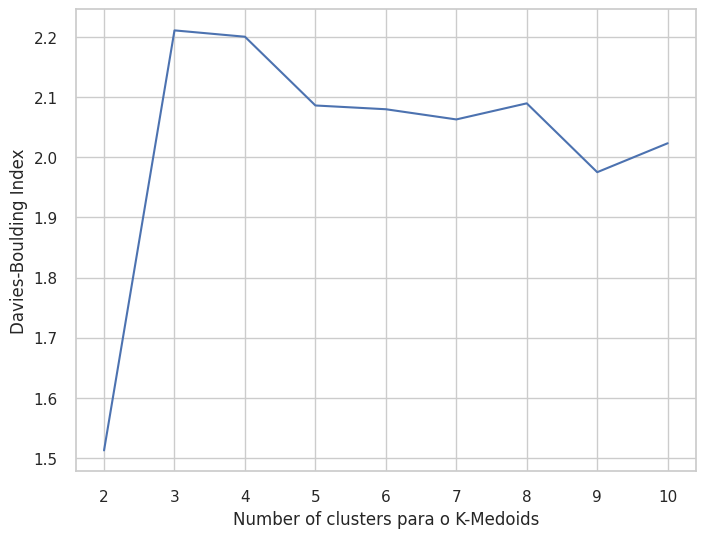

In [ ]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters para o K-Medoids")
plt.ylabel("Davies-Boulding Index")
plt.show()

Para o K-Medoids: K=2

**BIC:**

In [ ]:
k_values = range(2, 10)

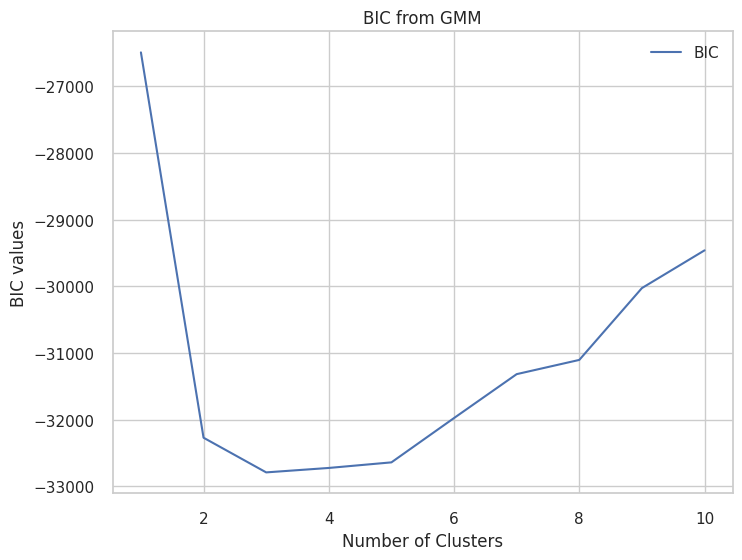

In [ ]:
from sklearn.mixture import GaussianMixture

# Create empty dictionary for BIC values
bic_score = {}
# Loop through different number of clusters
for i in range(1,11):
  # Create Gaussian Mixture Model
  gmm = GaussianMixture(n_components=i, random_state=0).fit(X)
  # Get BIC score for the model
  bic_score[i] = gmm.bic(X)

# Visualization
plt.figure(figsize=(8,6))
plt.plot(list(bic_score.keys()),list(bic_score.values()), label='BIC')
plt.legend(loc='best')
plt.title('BIC from GMM')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC values')
plt.show()

O BIC é baseado no cálculo da função de verossimilhança do modelo, que mede a probabilidade de observar os dados para um determinado modelo e um determinado número de clusters. O BIC leva em conta a complexidade do modelo, que é medida pelo número de parâmetros do modelo e pela quantidade de dados disponíveis, para determinar qual é o número ideal de clusters.

O BIC é definido pela seguinte fórmula:

BIC = -2 * log(L) + k * log(n)

No critério de informação bayesiano (BIC), quanto menor o valor, melhor é o modelo. Então, K=3.

**`Ao analisar os resultados de cada método e alguns comportamentos das variáveis do nosso dataset, decidimos usar K=3 para o K-Means e o K-Medoids.`**

#### 🏋️ Treinando...

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state=42).fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmedoids = KMedoids(n_clusters = 3, random_state=42).fit(X)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

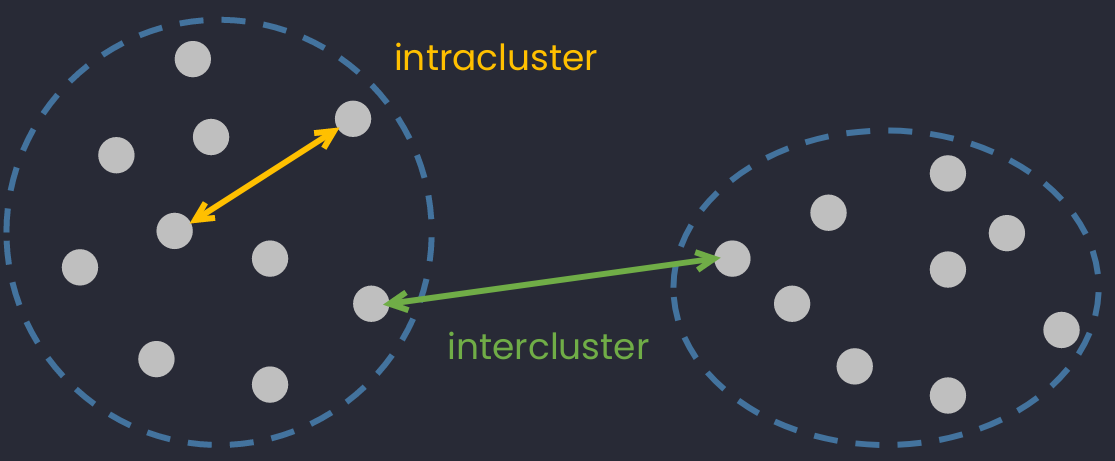

- A distância intracluster mede a semelhança entre os elementos dentro de cada cluster. É calculada como a média das distâncias entre todos os pares de elementos pertencentes ao mesmo cluster. Uma distância intracluster menor indica que os elementos dentro de um cluster são mais semelhantes entre si e que o agrupamento é mais homogêneo.

- A distância intercluster mede a dissimilaridade entre os clusters. É calculada como a distância média entre todos os pares de elementos pertencentes a clusters diferentes. Uma distância intercluster maior indica que os clusters são mais diferentes entre si e que o agrupamento é mais heterogêneo.

Uma boa clusterização deve apresentar uma distância intracluster pequena e uma distância intercluster grande, indicando que os elementos dentro de cada cluster são mais semelhantes entre si do que com os elementos de outros clusters.

#### Calculando distâncias inter-cluster do K-Means e K-Medoids:

In [ ]:
inter_cluster_dist_kmeans = euclidean_distances(kmeans.cluster_centers_)
inter_cluster_dist_kmedoids = euclidean_distances(kmedoids.cluster_centers_)
print('Average inter-cluster distance for KMedoids:', inter_cluster_dist_kmedoids.mean())
print('Average inter-cluster distance for Kmeans:', inter_cluster_dist_kmeans.mean())

Average inter-cluster distance for KMedoids: 0.3053601224831899
Average inter-cluster distance for Kmeans: 0.4821910478939632


#### Calculando distâncias intra-cluster do K-Means e K-Medoids:

In [ ]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Get the cluster centroids and labels
centroids_kmeans = kmeans.cluster_centers_
labels_kmeans = kmeans.labels_

# Calculate the intra-cluster distance
intra_cluster_distances = []
for i in range(kmeans.n_clusters):
    cluster_points = X[labels_kmeans == i]
    centroid = centroids_kmeans[i]
    distances = cdist(cluster_points, [centroid])
    print(i, np.mean(distances))
    intra_cluster_distances.append(np.mean(distances))

avg_intra_cluster_distance = np.mean(intra_cluster_distances)

print("Average intra-cluster distance for Kmeans:", avg_intra_cluster_distance)

0 0.5028115233952577
1 0.45509292951777464
2 0.4326859682922988
Average intra-cluster distance for Kmeans: 0.46353014040177704


In [ ]:
centroids_kmedoids = kmedoids.cluster_centers_
labels_kmedoids = kmedoids.labels_

# Calculate the intra-cluster distance
intra_cluster_distances = []
for i in range(kmedoids.n_clusters):
    cluster_points = X[labels_kmedoids == i]
    centroid = centroids_kmedoids[i]
    distances = cdist(cluster_points, [centroid])
    print(i, np.mean(distances))
    intra_cluster_distances.append(np.mean(distances))

avg_intra_cluster_distance = np.mean(intra_cluster_distances)

print("Average intra-cluster distance for KMedoids:", avg_intra_cluster_distance)

0 0.5653289799572705
1 0.43217040939717444
2 0.47299787417373196
Average intra-cluster distance for KMedoids: 0.4901657545093923


Podemos observar que o K-means tem uma distância intracluster menor e uma distância intercluster maior. Sendo assim, concluímos que ele possui o melhor desempenho.

In [ ]:
labels_kmeans = kmeans.labels_
labels_kmedoids =  KMedoids(n_clusters = 3, random_state = 42).fit_predict(X)

In [ ]:
result_kmeans = pd.concat([pd.DataFrame(labels_kmeans), df], axis=1)
result_kmedoids = pd.concat([pd.DataFrame(labels_kmedoids), df], axis=1)

In [ ]:
result_kmeans.rename({0: 'Result'}, inplace = True, axis=1)
result_kmedoids.rename({0: 'Result'}, inplace = True, axis=1)

In [ ]:
result_kmeans.head(2)

,Result,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,...,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,2,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,...,3300,450,2200,70,78,18.1,12,7041,60,1
1,2,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,...,6450,750,1500,29,30,12.2,16,10527,56,1


In [ ]:
result_kmedoids.head(2)

,Result,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,...,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,2,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,...,3300,450,2200,70,78,18.1,12,7041,60,1
1,1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,...,6450,750,1500,29,30,12.2,16,10527,56,1


#### Explorando o resultado dos agrupamentos para os dois algoritmos:

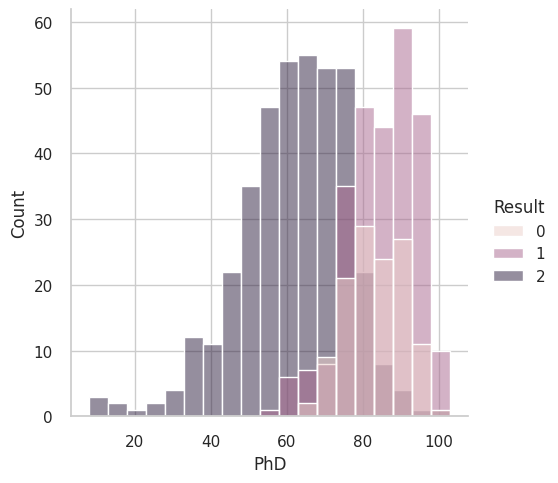

In [ ]:
sns.displot(data=result_kmeans, x='PhD', hue='Result')

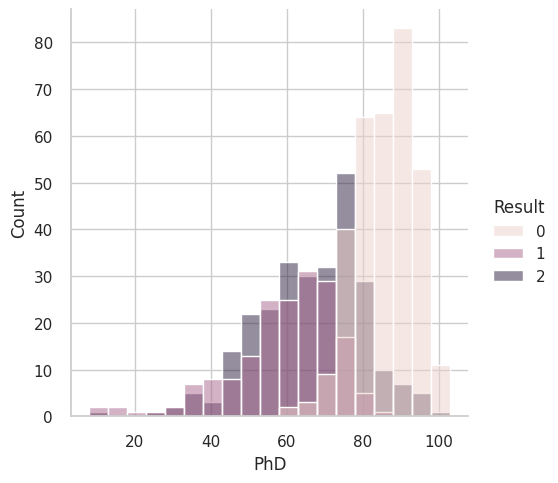

In [ ]:
sns.displot(data=result_kmedoids, x='PhD', hue='Result')

In [ ]:
agg_kmeans = result_kmeans.groupby(by='Result').mean().reset_index()
agg_kmedoids = result_kmedoids.groupby(by='Result').mean().reset_index()

<ipython-input-385-7b71df596d4a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg_kmeans = result_kmeans.groupby(by='Result').mean().reset_index()
<ipython-input-385-7b71df596d4a>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg_kmedoids = result_kmedoids.groupby(by='Result').mean().reset_index()


In [ ]:
agg_kmeans

,Result,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster
0,0,8317.274194,5757.532258,2375.870968,27.233871,60.201613,12498.717742,2870.870968,7511.072581,3966.201613,589.217742,1854.967742,82.733871,88.774194,17.022581,14.540323,8420.491935,56.830645,0.072581
1,1,2994.566540,1809.939163,599.460076,42.581749,72.311787,2415.197719,311.060837,14473.520913,5108.292776,558.897338,1116.159696,84.490494,90.380228,11.812928,32.247148,13617.585551,77.992395,0.950570
2,2,1316.307692,970.930769,394.289744,17.530769,43.258974,1768.692308,581.461538,8652.541026,3975.661538,530.297436,1328.494872,61.479487,69.617949,14.692564,18.943590,7385.607692,59.758974,0.784615


[Text(0.5, 1.0, 'Gastos dos alunos por Cluster (K-Means)')]

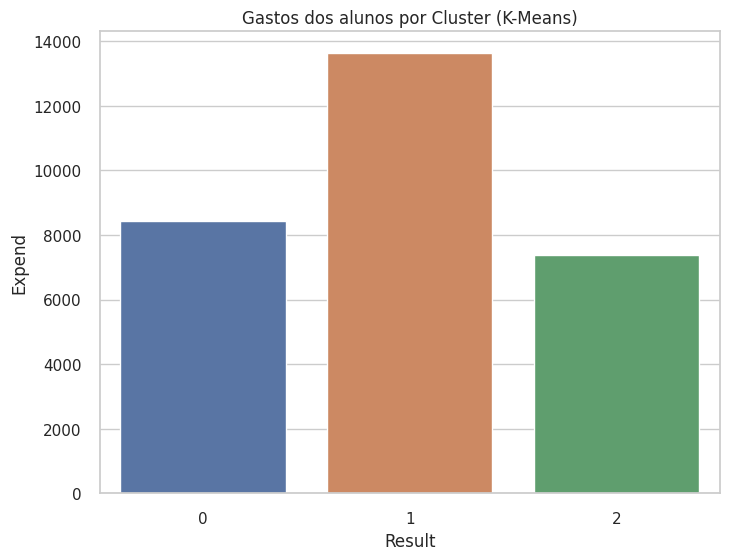

In [ ]:
sns.barplot(data=agg_kmeans, x='Result', y='Expend').set(title='Gastos dos alunos por Cluster (K-Means)')

[Text(0.5, 1.0, 'Gastos dos alunos por Cluster (K-Medoids)')]

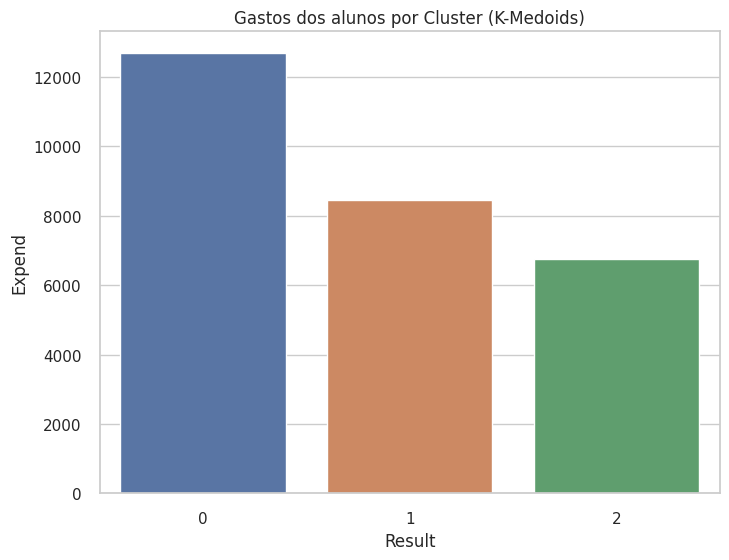

In [ ]:
sns.barplot(data=agg_kmedoids, x='Result', y='Expend').set(title='Gastos dos alunos por Cluster (K-Medoids)')

[Text(0.5, 1.0, 'Quantidade de inscrições por Cluster (K-Means)')]

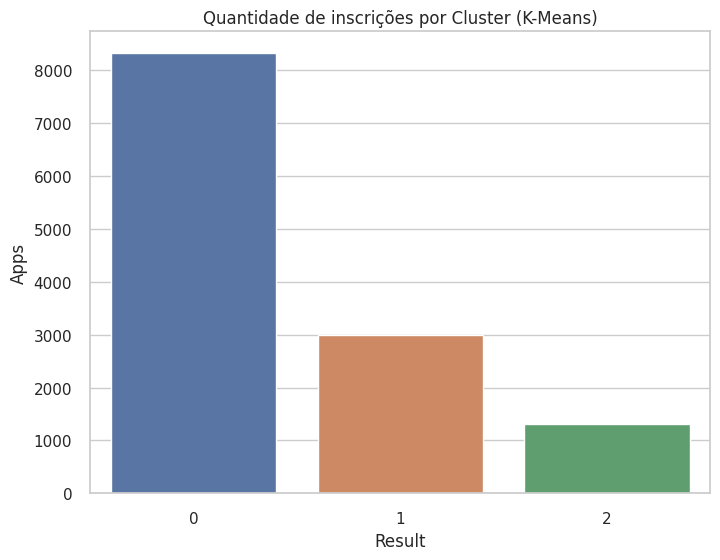

In [ ]:
sns.barplot(data=agg_kmeans, x='Result', y='Apps').set(title='Quantidade de inscrições por Cluster (K-Means)')

[Text(0.5, 1.0, 'Quantidade de inscrições por Cluster (K-Medoids)')]

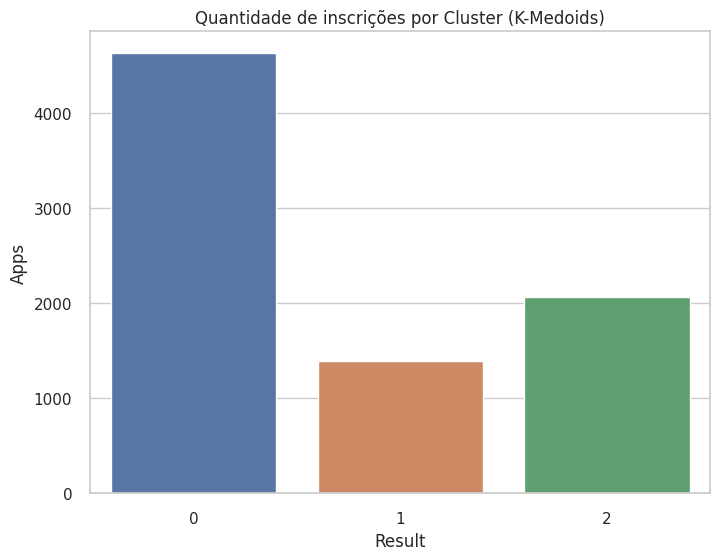

In [ ]:
sns.barplot(data=agg_kmedoids, x='Result', y='Apps').set(title='Quantidade de inscrições por Cluster (K-Medoids)')

[Text(0.5, 1.0, 'Proporção de escolas privadas por Cluster (K-Means)')]

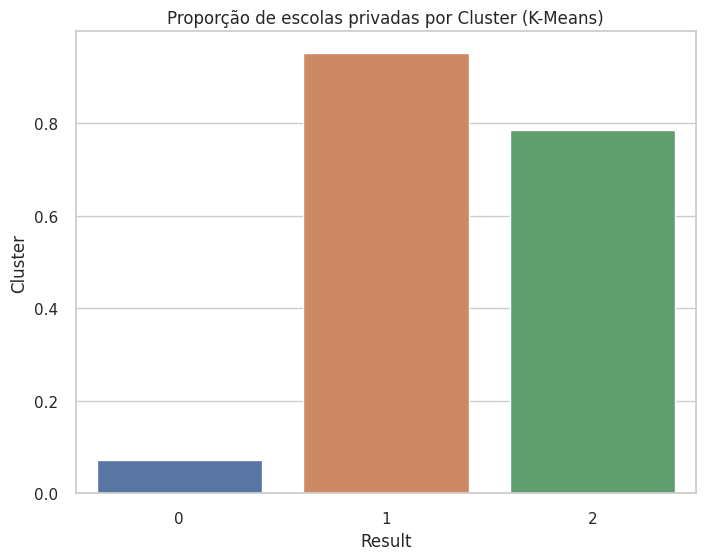

In [ ]:
sns.barplot(data=agg_kmeans, x='Result', y='Cluster').set(title='Proporção de escolas privadas por Cluster (K-Means)')

[Text(0.5, 1.0, 'Proporção de escolas privadas por Cluster (K-Medoids)')]

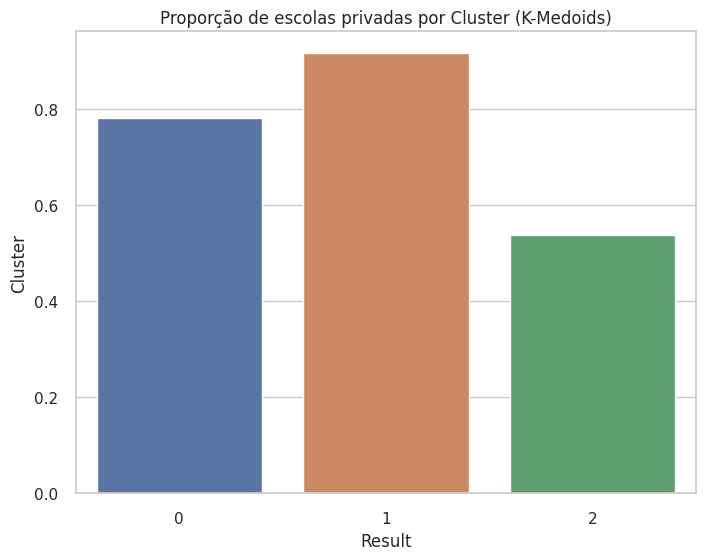

In [ ]:
sns.barplot(data=agg_kmedoids, x='Result', y='Cluster').set(title='Proporção de escolas privadas por Cluster (K-Medoids)')

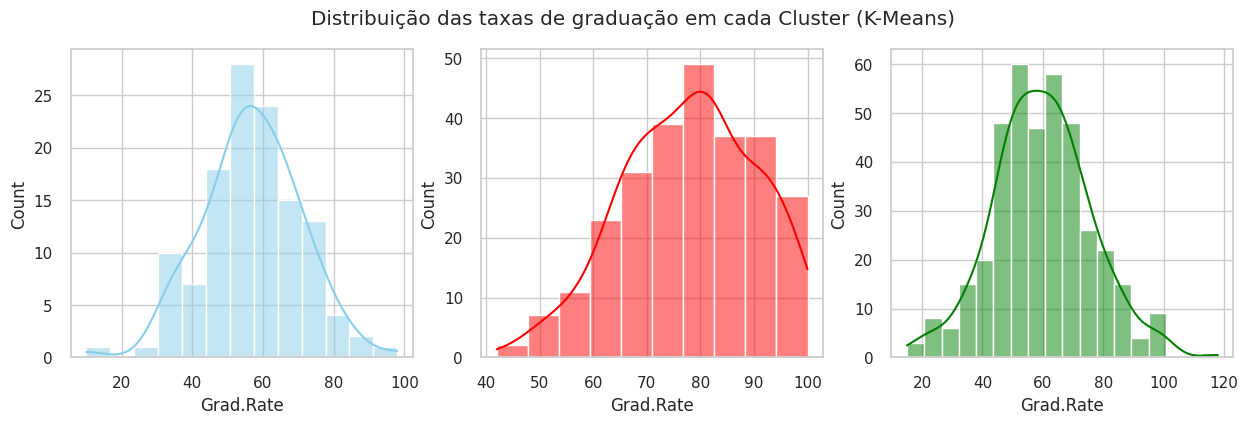

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15, 4))

sns.histplot(data=result_kmeans[result_kmeans['Result'] == 0], x='Grad.Rate', kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=result_kmeans[result_kmeans['Result'] == 1], x='Grad.Rate', kde=True, color="red", ax=axs[1])
sns.histplot(data=result_kmeans[result_kmeans['Result'] == 2], x='Grad.Rate', kde=True, color="green", ax=axs[2])
fig.suptitle('Distribuição das taxas de graduação em cada Cluster (K-Means)')

plt.show()

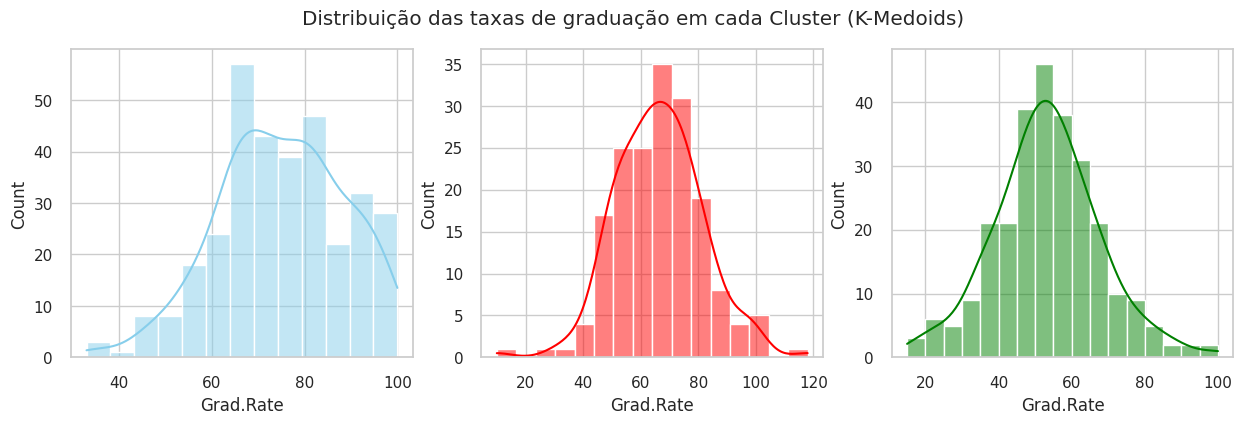

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15, 4))

sns.histplot(data=result_kmeans[result_kmedoids['Result'] == 0], x='Grad.Rate', kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=result_kmeans[result_kmedoids['Result'] == 1], x='Grad.Rate', kde=True, color="red", ax=axs[1])
sns.histplot(data=result_kmeans[result_kmedoids['Result'] == 2], x='Grad.Rate', kde=True, color="green", ax=axs[2])
fig.suptitle('Distribuição das taxas de graduação em cada Cluster (K-Medoids)')

plt.show()

In [ ]:
from sklearn.decomposition import PCA

#### Visualizando os clusters através de análise PCA

Usamos PCA (Principal Component Analysis) para visualizar clusters resultantes de um k-algoritmo de clustering em um dataset n-dimensional porque o PCA pode reduzir a dimensionalidade do conjunto de dados, projetando-o em um espaço de dimensão menor que preserva a maior parte da variabilidade dos dados originais.

O PCA é uma técnica útil para visualizar clusters em um espaço de dimensão reduzida, facilitando a interpretação dos resultados do k-means. Além disso, o PCA ajuda a identificar as variáveis mais importantes para a separação dos clusters, o que pode ser útil para entender as características dos dados e a interpretação dos resultados.

Para o K-Means:

In [ ]:
k_means3 = KMeans(n_clusters=3)
pca=PCA(n_components=2)
principalComponents = pca.fit_transform(df_numeric_scaled)
PCA_components = pd.DataFrame(principalComponents)
X_clustered = k_means3.fit_predict(PCA_components)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
Label_color_map={0:'r',1:'g', 2:'b'}
label_color=[Label_color_map[i] for i in X_clustered]

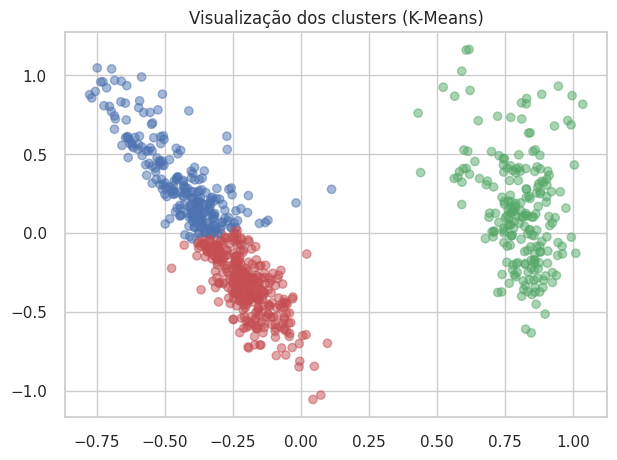

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=label_color,alpha=0.5)
plt.title('Visualização dos clusters (K-Means)')

plt.show()

Para o K-Medoids:

In [ ]:
kmedoids3 = KMedoids(n_clusters=3)
pca=PCA(n_components=2)
principalComponents = pca.fit_transform(df_numeric_scaled)
PCA_components = pd.DataFrame(principalComponents)
X_clustered = kmedoids3.fit_predict(PCA_components)

In [ ]:
Label_color_map={0:'r',1:'g', 2:'b'}
label_color=[Label_color_map[i] for i in X_clustered]

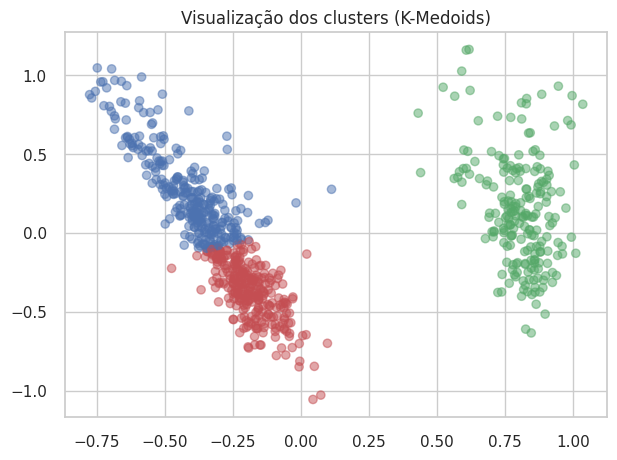

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(principalComponents[:,0],principalComponents[:,1],c=label_color,alpha=0.5)
plt.title('Visualização dos clusters (K-Medoids)')

plt.show()

**Conclusão:**

Podemos concluir que existem características que são compartilhadas entre universidades públicas e privadas, o que faz os pontos ficarem sobrepostos quando analisamos as classes em "Private", mas isso fica ainda mais evidente quando utilizamos um método não-supervisionado de agrupamento com um K diferente do número de classes que tinhamos para uma abordagem supervisionada de classificação.